In [62]:
import plotly.express as px
import pandas as pd

data = pd.read_csv("C:\\Users\\hp\\id2\\bg\\PatentsProject\\fpo_data.csv")



In [65]:
data.head()

,Document Number,Document Type,Publication Date,Title,Abstract,Inventor Name,Assignee,Filing Date
0,DE102022133524A1,DE,2023-06-22,Luftfahrzeugantriebssystem,Ein Antriebssystem (4) für ein Luftfahrzeug (1...,SWANN PETER (GB); BEMMENT CRAIG W (GB); HOBDAY...,"ROLLS ROYCE PLC (London, GB)",2022-12-15
1,DE102022133535A1,DE,2023-06-22,BESTIMMUNG VON KRAFTSTOFFMERKMALEN,Die vorliegende Anmeldung offenbart ein Verfah...,SWANN PETER (GB); BEAVEN DAVID M (GB); BEMMENT...,"ROLLS ROYCE PLC (London, GB)",2022-12-15
2,DE102022133677A1,DE,2023-06-22,BESTIMMUNG VON KRAFTSTOFFMERKMALEN,Die vorliegende Anmeldung offenbart ein Verfah...,SWANN PETER (GB); BEAVEN DAVID M (GB); BEMMENT...,"ROLLS ROYCE PLC (London, GB)",2022-12-16
3,DE102022133862A1,DE,2023-06-22,LEISTUNGSPARAMETER,Die vorliegende Anmeldung offenbart ein Verfah...,SWANN PETER (GB); BEAVEN DAVID M (GB); BEMMENT...,"ROLLS ROYCE PLC (London, GB)",2022-12-19
4,DE102022133870A1,DE,2023-06-22,BESTIMMUNG VON KRAFTSTOFFMERKMALEN,Ein Verfahren (1040) zur Bestimmung eines oder...,SWANN PETER (GB); BEAVEN DAVID M (GB); BEMMENT...,"ROLLS ROYCE PLC (London, GB)",2022-12-19


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document Number   3500 non-null   object
 1   Document Type     3500 non-null   object
 2   Publication Date  3500 non-null   object
 3   Title             3499 non-null   object
 4   Abstract          3473 non-null   object
 5   Inventor Name     3495 non-null   object
 6   Assignee          3499 non-null   object
 7   Filing Date       3500 non-null   object
dtypes: object(8)
memory usage: 218.9+ KB


In [42]:
print(data.describe(include='all'))


         Document Number Document Type Publication Date               Title  \
count               3500          3500             3500                3499   
unique              3500             5             2268                2420   
top     DE102022133524A1            US       09/18/2014  PROCESSING BIOMASS   
freq                   1          2450               15                  25   

                                                 Abstract  \
count                                                3473   
unique                                               2213   
top     Biomass (e.g., plant biomass, animal biomass, ...   
freq                                                   38   

                               Inventor Name            Assignee Filing Date  
count                                   3495                3499        3500  
unique                                  2073                1722        1995  
top     Medoff, Marshall (Brookline, MA, US)  Assignee not fo

# 2D ANALYSE

In [68]:
data['Filing Date'] = pd.to_datetime(data['Filing Date'], errors='coerce')
data['Publication Date'] = pd.to_datetime(data['Publication Date'], errors='coerce')
data['Days Between Filing and Publication'] = (data['Publication Date'] - data['Filing Date']).dt.days
PandF = data['Days Between Filing and Publication'].describe()


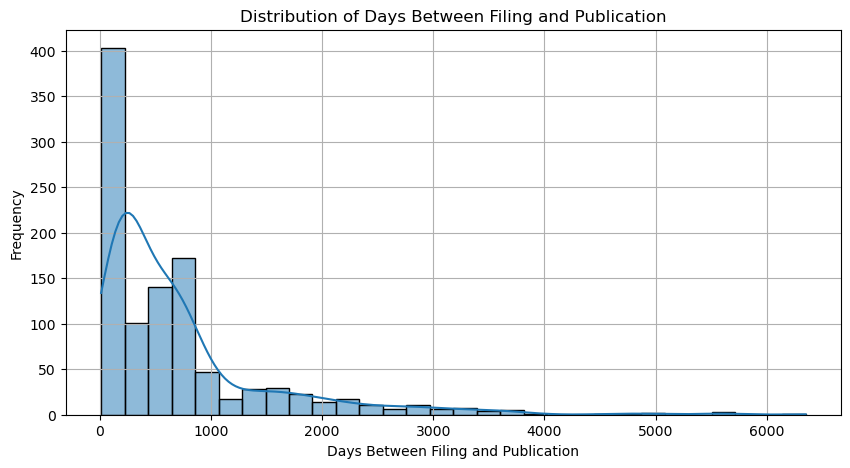

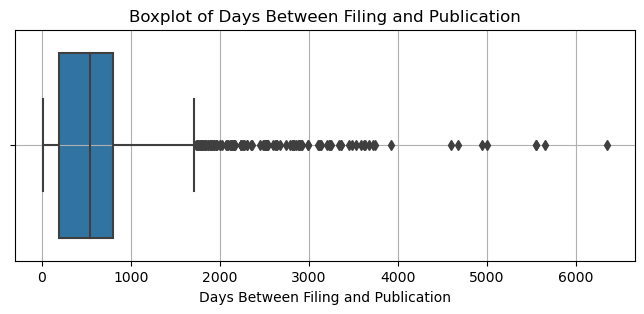

In [48]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['Days Between Filing and Publication'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days Between Filing and Publication')
plt.xlabel('Days Between Filing and Publication')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(8,3 ))
sns.boxplot(x=data['Days Between Filing and Publication'].dropna())
plt.title('Boxplot of Days Between Filing and Publication')
plt.xlabel('Days Between Filing and Publication')
plt.grid(True)
plt.show()

In [51]:
document_type_counts = data.groupby('Assignee')['Document Type'].value_counts().unstack().fillna(0)



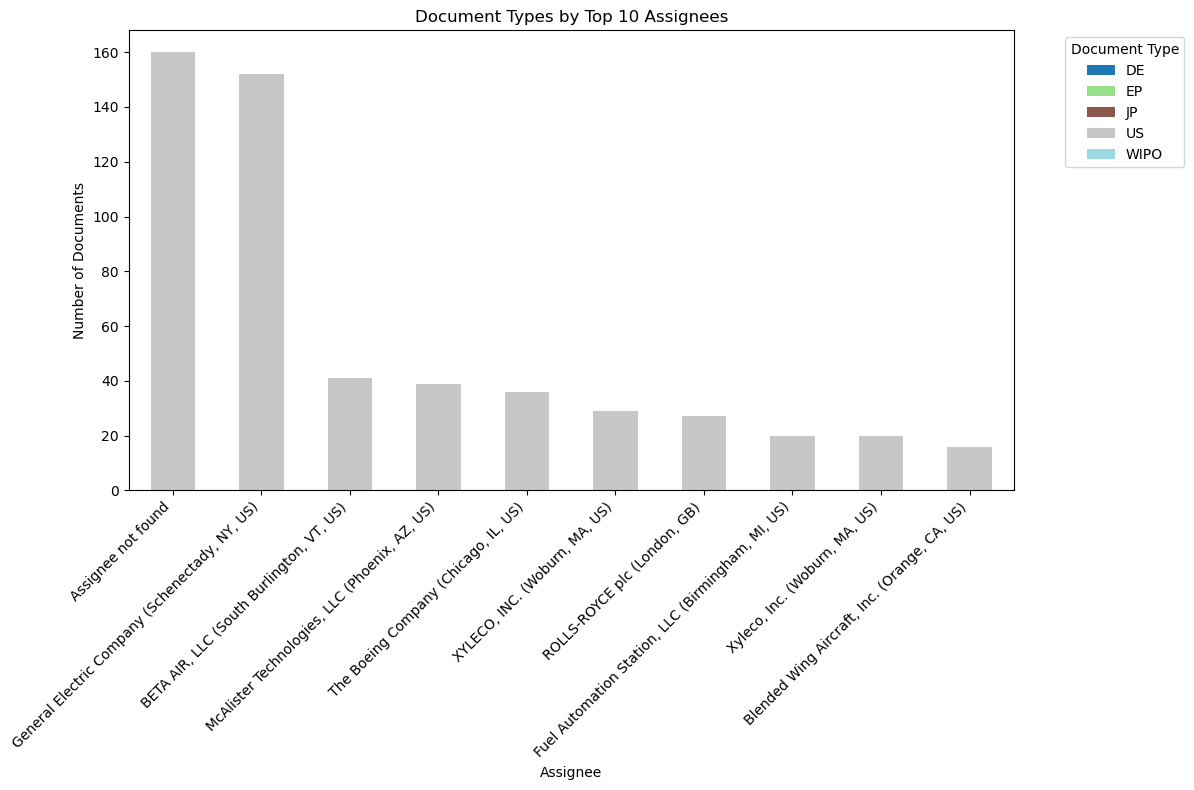

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignorer les avertissements spécifiques des glyphes manquants
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph .* missing from current font.")

# Group by 'Assignee' and count the occurrences of 'Document Type'
document_type_counts = data.groupby('Assignee')['Document Type'].value_counts().unstack().fillna(0)

# Sélectionner les 10 assignees ayant le plus de documents
top_assignees = document_type_counts.sum(axis=1).nlargest(10).index
document_type_counts_top = document_type_counts.loc[top_assignees]

# Plotting a stacked bar chart
ax = document_type_counts_top.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Adding title and labels
plt.title('Document Types by Top 10 Assignees')
plt.xlabel('Assignee')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Document Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()



In [11]:
documents_per_inventor = data.groupby('Inventor Name')['Document Number'].count().reset_index()
documents_per_inventor.to_csv('documents_per_inventor.csv', index=False)
print(documents_per_inventor)


                                          Inventor Name  Document Number
0     AALTO PEKKA (FI); SANDBERG KATI (FI); NYMAN TO...                3
1                      AB Industry Osaka salmon yukichu                1
2     ABDEL NOUR PIERRE (IT); BRUGHERA PAOLO (IT); C...                2
3     ABHARI RAMIN (US); ASHBY ERIK (US); GOLDEN CAR...                1
4     ABHARI RAMIN (US); HAVERLY MARTIN (US); BERG M...                2
...                                                 ...              ...
2068                                      デユボワ，ジヤン−リユツク                1
2069  ナレンドラ ディガンバー Joshi; ヴェン cut S ワール tongue ギララ; ...                1
2070                                ハーランド，ピーター; ハーネス，ケン                1
2071                              ヘイサム，  ヤクブ; リマ，  ゴーセン                1
2072      山根  健次; 村上  睦尚; 松本  隆弘; 猪原  祥行; 藤木  信彦; 綾  威雄                1

[2073 rows x 2 columns]


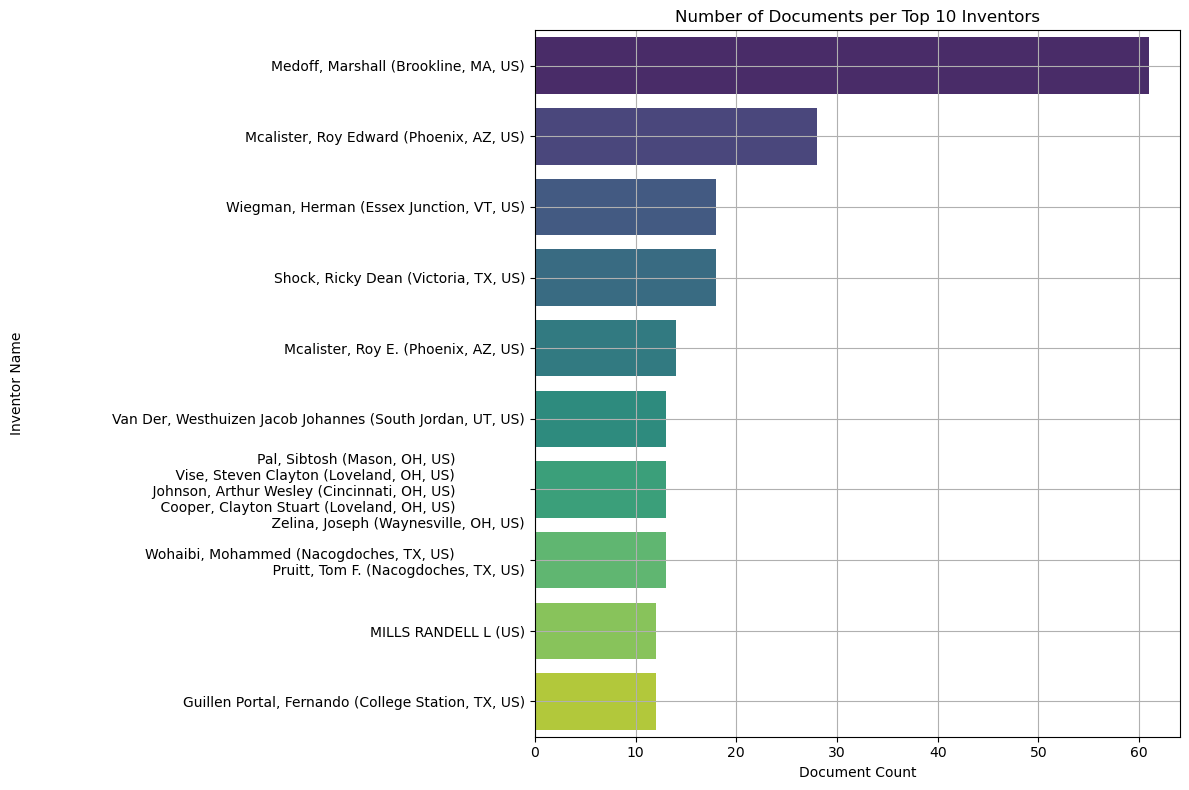

In [56]:
# Ignorer les avertissements spécifiques des glyphes manquants
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph .* missing from current font.")

# Group by 'Inventor Name' and count the number of documents
documents_per_inventor = data.groupby('Inventor Name')['Document Number'].count().reset_index()
documents_per_inventor.columns = ['Inventor Name', 'Document Count']

# Sélectionner les 10 inventeurs ayant le plus de documents
top_inventors = documents_per_inventor.sort_values(by='Document Count', ascending=False).head(10)

# Plotting a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Document Count', y='Inventor Name', data=top_inventors, palette='viridis')

# Adding title and labels
plt.title('Number of Documents per Top 10 Inventors')
plt.xlabel('Document Count')
plt.ylabel('Inventor Name')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Analyse 3D

In [57]:
documents_per_assignee_inventor = data.groupby(['Assignee', 'Inventor Name', 'Document Type']).size().reset_index(name='Document Count')


In [60]:
import pandas as pd
import plotly.express as px

# Group by 'Assignee', 'Inventor Name', and 'Document Type', then count the occurrences
documents_per_assignee_inventor = data.groupby(['Assignee', 'Inventor Name', 'Document Type']).size().reset_index(name='Document Count')

# Sélectionner les 20 principaux assignés
top_assignees = documents_per_assignee_inventor.groupby('Assignee')['Document Count'].sum().nlargest(20).index
filtered_data = documents_per_assignee_inventor[documents_per_assignee_inventor['Assignee'].isin(top_assignees)]

# Sélectionner les 20 principaux inventeurs
top_inventors = filtered_data.groupby('Inventor Name')['Document Count'].sum().nlargest(20).index
filtered_data = filtered_data[filtered_data['Inventor Name'].isin(top_inventors)]

# Plotting a 3D scatter plot
fig = px.scatter_3d(filtered_data, 
                    x='Assignee', 
                    y='Inventor Name', 
                    z='Document Count', 
                    color='Document Type', 
                    size='Document Count',
                    title='3D Visualization of Documents per Assignee and Inventor',
                    labels={'Assignee': 'Assignee', 'Inventor Name': 'Inventor', 'Document Count': 'Document Count'})

# Show the plot
fig.show()

# Save the plot to an HTML file
fig.write_html('documents_per_assignee_inventor_3d.html')


In [61]:
fig.write_html('documents_per_assignee_inventor_3d.html')


In [69]:
documents_by_dates = data.groupby([data['Publication Date'].dt.year, data['Filing Date'].dt.year])['Document Number'].count().reset_index()



In [72]:
documents_by_dates.columns = ['Publication Year', 'Filing Year', 'Document Count']

fig = px.scatter_3d(documents_by_dates, x='Publication Year', y='Filing Year', z='Document Count',
                    color='Document Count', size='Document Count', size_max=20,
                    title='Number of Documents by Publication and Filing Year')

fig.show()

In [73]:
fig.write_html("3d_visualization.html")


In [75]:
import pandas as pd
import plotly.express as px
import random
from datetime import datetime, timedelta

# Fonction pour générer des dates aléatoires entre deux dates
def random_dates(start, end, n=10):
    start_u = start.timestamp()
    end_u = end.timestamp()
    return [datetime.fromtimestamp(random.randint(start_u, end_u)) for _ in range(n)]

# Générer des dates aléatoires
publication_dates = random_dates(datetime(2018, 1, 1), datetime(2023, 12, 31), 100)
filing_dates = random_dates(datetime(2017, 1, 1), datetime(2023, 12, 31), 100)
document_numbers = list(range(1, 101))

# Création du DataFrame
data = pd.DataFrame({
    'Publication Date': publication_dates,
    'Filing Date': filing_dates,
    'Document Number': document_numbers
})

# Conversion des colonnes en datetime (si nécessaire)
data['Publication Date'] = pd.to_datetime(data['Publication Date'])
data['Filing Date'] = pd.to_datetime(data['Filing Date'])

# Groupement par année de Publication et de Dépôt
documents_by_dates = data.groupby([data['Publication Date'].dt.year, data['Filing Date'].dt.year])['Document Number'].count().reset_index()
documents_by_dates.columns = ['Publication Year', 'Filing Year', 'Document Count']

# Création de la visualisation 3D
fig = px.scatter_3d(documents_by_dates, x='Publication Year', y='Filing Year', z='Document Count',
                    color='Document Count', size='Document Count', size_max=20,
                    title='Number of Documents by Publication and Filing Year')

# Enregistrement de la visualisation sous forme de fichier HTML
fig.write_html("3d_visualization2.html")

# Affichage de la visualisation
fig.show()


# Analyse 4D

In [17]:
data['Publication Year'] = data['Publication Date'].dt.year
documents_per_assignee_inventor_type_year = data.groupby(['Assignee', 'Inventor Name', 'Document Type', 'Publication Year']).size().reset_index(name='Document Count')
documents_per_assignee_inventor_type_year.to_csv('documents_per_assignee_inventor_type_year.csv', index=False)
documents_per_assignee_inventor_type_year.head()


,Assignee,Inventor Name,Document Type,Publication Year,Document Count
0,2020 POWER GENERATION LTD (Shoreham by Sea Wes...,COATES NICHOLAS RICHARD (GB),EP,2017.0,1
1,AB Industry Osaka salmon yukichu,AB Industry Osaka salmon yukichu,JP,1995.0,1
2,AC AERONAUTICAL LTD (GB),HIGGS ANDREW (JP),WIPO,2013.0,2
3,"ACCELERGY CORP (Houston, TX 77002, US)",FIATO ROCCO A (US); BAUMAN RICHARD F (US); ZAC...,EP,2018.0,1
4,"ACCELERGY CORP (Houston, TX 77007, US)",FIATO ROCCO A (US); BAUMAN RICHARD F (US); ZAC...,EP,2019.0,1


In [18]:
data['Abstract Length'] = data['Abstract'].apply(lambda x: len(x) if isinstance(x, str) else 0)
abstract_length_analysis = data.groupby(['Assignee', 'Inventor Name', 'Document Type'])['Abstract Length'].describe().reset_index()
abstract_length_analysis.to_csv('abstract_length_analysis.csv', index=False)
abstract_length_analysis.head()


,Assignee,Inventor Name,Document Type,count,mean,std,min,25%,50%,75%,max
0,2020 POWER GENERATION LIMITED (GB),"Coates, Nicholas Richard (East Sussex, GB)",US,1.0,871.0,NaN,871.0,871.0,871.0,871.0,871.0
1,2020 POWER GENERATION LTD (Shoreham by Sea Wes...,COATES NICHOLAS RICHARD (GB),EP,1.0,871.0,NaN,871.0,871.0,871.0,871.0,871.0
2,"A-T-O Inc. (Willoughby, OH)","Heintz, Clifford E. (Buffalo, NY)",US,1.0,255.0,NaN,255.0,255.0,255.0,255.0,255.0
3,AB Industry Osaka salmon yukichu,AB Industry Osaka salmon yukichu,JP,1.0,1195.0,NaN,1195.0,1195.0,1195.0,1195.0,1195.0
4,AC AERONAUTICAL LTD (GB),HIGGS ANDREW (JP),WIPO,2.0,561.0,0.0,561.0,561.0,561.0,561.0,561.0


# Analyse 5D

In [20]:
data['Filing Year'] = data['Filing Date'].dt.year
documents_per_assignee_inventor_type_pub_filing_year = data.groupby(['Assignee', 'Inventor Name', 'Document Type', 'Publication Year', 'Filing Year']).size().reset_index(name='Document Count')
documents_per_assignee_inventor_type_pub_filing_year.to_csv('documents_per_assignee_inventor_type_pub_filing_year.csv', index=False)
documents_per_assignee_inventor_type_pub_filing_year.head()


,Assignee,Inventor Name,Document Type,Publication Year,Filing Year,Document Count
0,2020 POWER GENERATION LTD (Shoreham by Sea Wes...,COATES NICHOLAS RICHARD (GB),EP,2017.0,2010.0,1
1,AB Industry Osaka salmon yukichu,AB Industry Osaka salmon yukichu,JP,1995.0,1993.0,1
2,AC AERONAUTICAL LTD (GB),HIGGS ANDREW (JP),WIPO,2013.0,2013.0,2
3,"ACCELERGY CORP (Houston, TX 77002, US)",FIATO ROCCO A (US); BAUMAN RICHARD F (US); ZAC...,EP,2018.0,2011.0,1
4,"ACCELERGY CORP (Houston, TX 77007, US)",FIATO ROCCO A (US); BAUMAN RICHARD F (US); ZAC...,EP,2019.0,2011.0,1


CSV file has been successfully converted to C:\\Users\\hp\\id2\\bg\\PatentsProject\\resultats\\word_freq.xlsx
